In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n[2] Exploratory Data Analysis...")

# Basic info
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
print("\n--- Dataset Information ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())


[2] Exploratory Data Analysis...

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  fl

In [2]:
# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")


Missing values: 0


In [3]:
# Class distribution
print("\n--- Target Variable Distribution ---")
class_counts = df['Diabetes_012'].value_counts().sort_index()
print(class_counts)
print(f"\nClass Percentages:")
print(df['Diabetes_012'].value_counts(normalize=True).sort_index() * 100)


--- Target Variable Distribution ---
Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Class Percentages:
Diabetes_012
0.0    84.241170
1.0     1.825528
2.0    13.933302
Name: proportion, dtype: float64


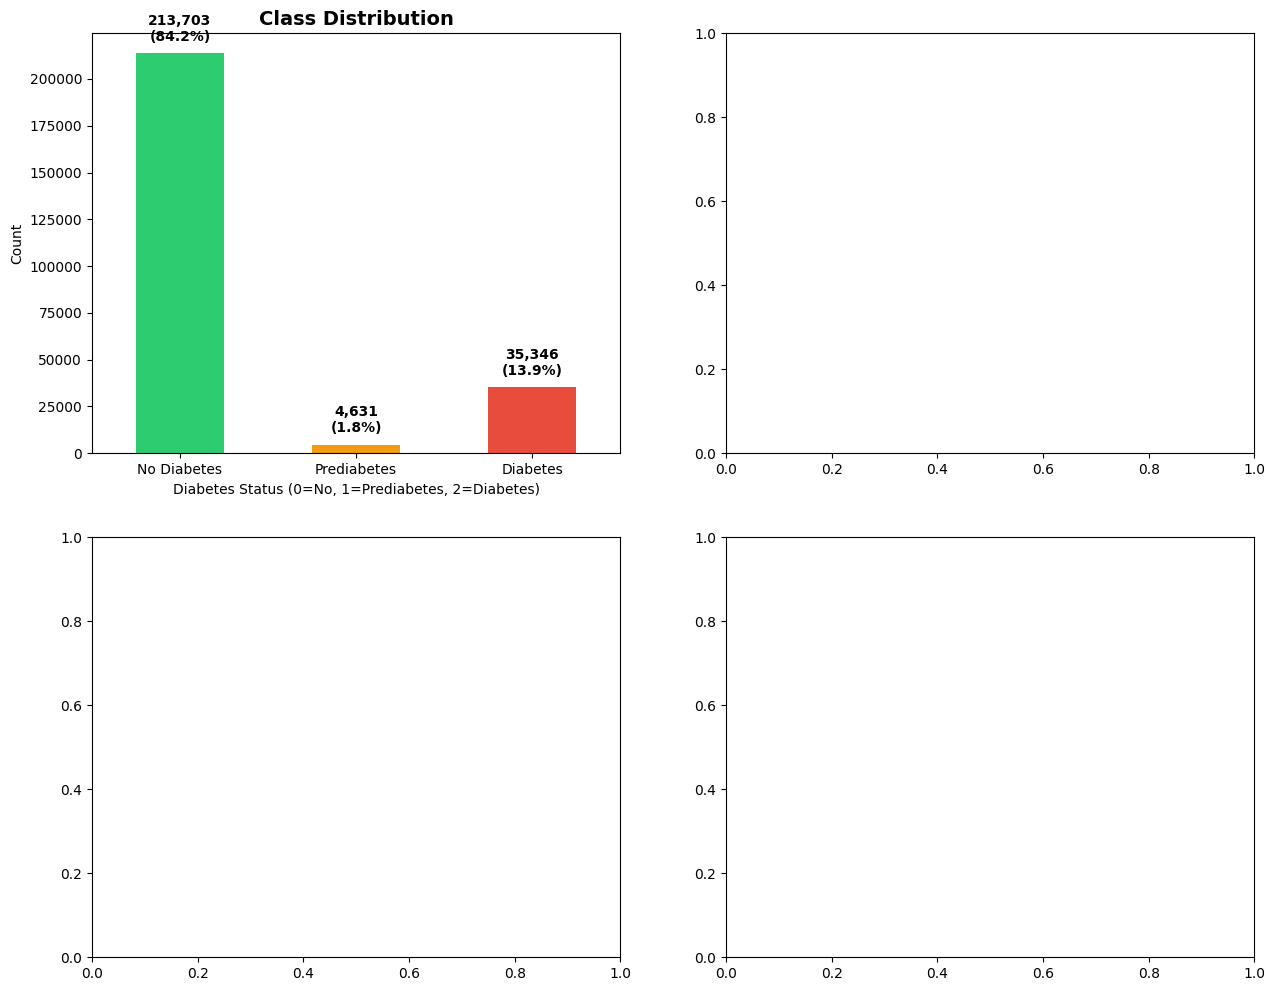

In [4]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Class Distribution
class_counts.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0, 0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Diabetes Status (0=No, 1=Prediabetes, 2=Diabetes)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'], rotation=0)
for i, v in enumerate(class_counts):
    axes[0, 0].text(i, v + 5000, f'{v:,}\n({v/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

In [5]:
# 2. Correlation Heatmap
features_for_corr = df.columns.drop('Diabetes_012')
corr_matrix = df[features_for_corr].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, ax=axes[0, 1],
            cbar_kws={'label': 'Correlation'}, square=False)
axes[0, 1].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [6]:
# 3. Feature distributions by diabetes status
key_features = ['BMI', 'Age', 'GenHlth', 'HighBP', 'HighChol']
for idx, feature in enumerate(key_features[:2]):
    axes[1, idx].hist([df[df['Diabetes_012']==0][feature],
                       df[df['Diabetes_012']==1][feature],
                       df[df['Diabetes_012']==2][feature]],
                      bins=20, label=['No Diabetes', 'Prediabetes', 'Diabetes'],
                      alpha=0.7, edgecolor='black')
    axes[1, idx].set_title(f'{feature} Distribution by Diabetes Status',
                          fontsize=12, fontweight='bold')
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].legend()

plt.tight_layout()
plt.savefig('eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

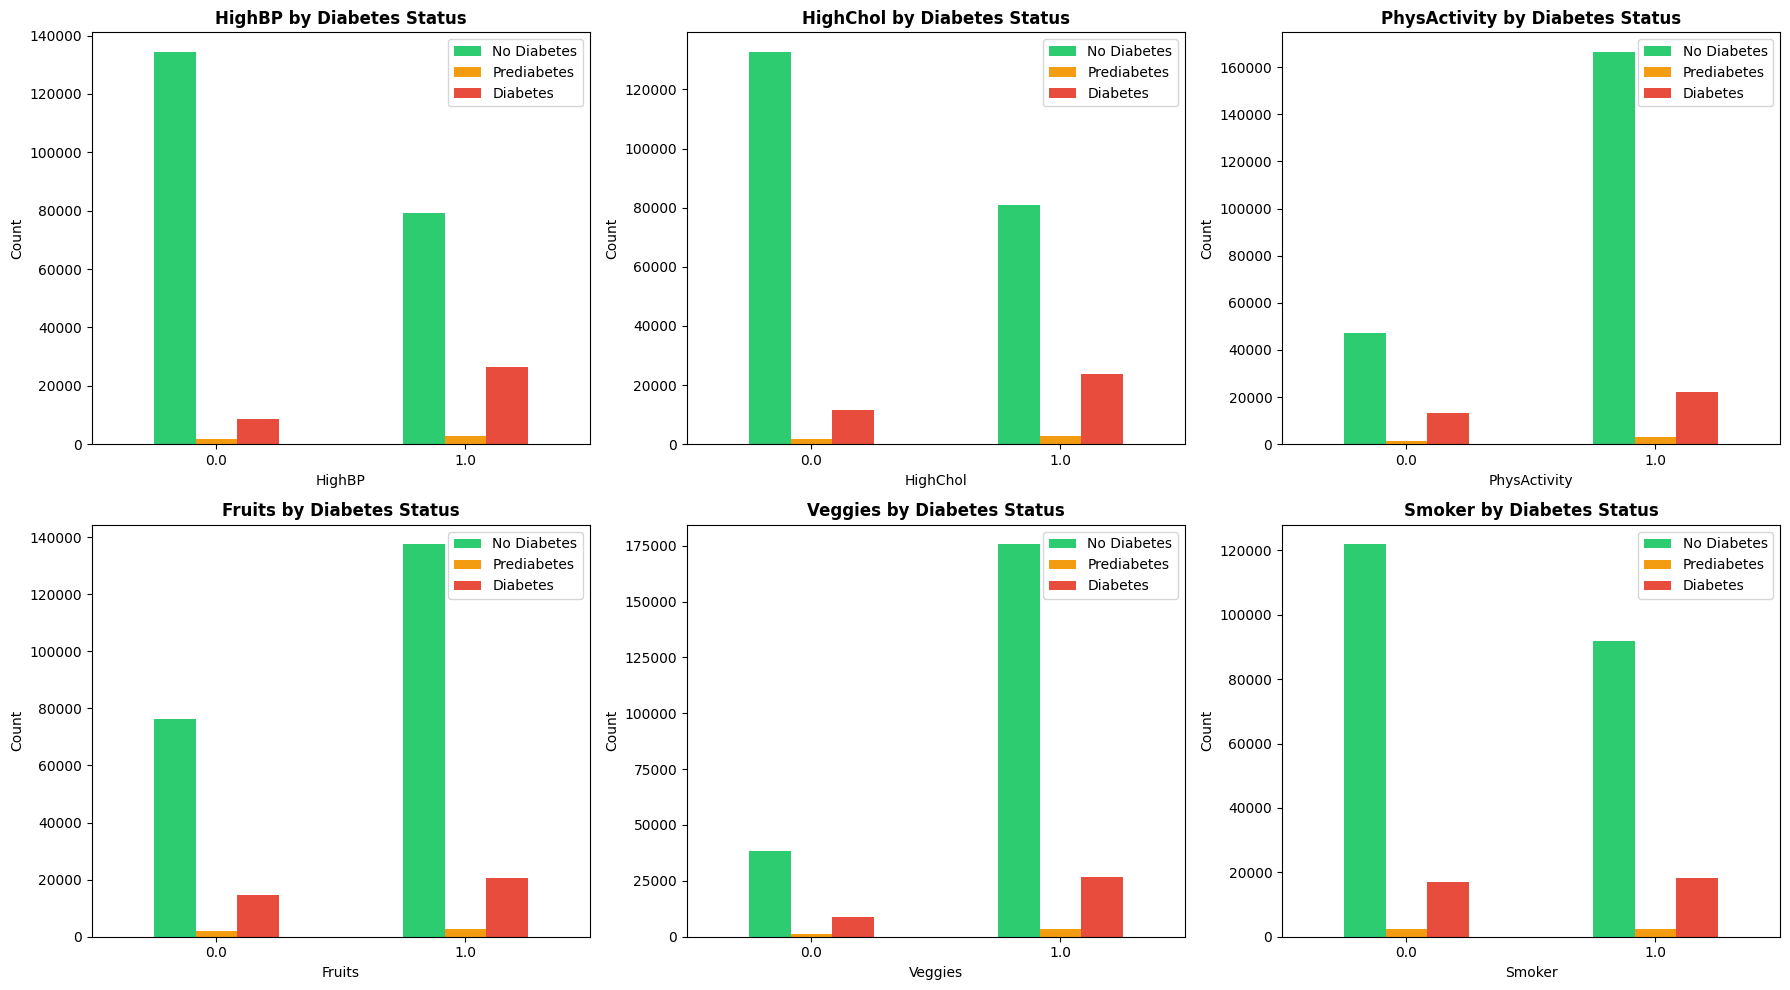

In [7]:
# Additional feature analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
feature_list = ['HighBP', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies', 'Smoker']

for idx, feature in enumerate(feature_list):
    ax = axes[idx // 3, idx % 3]
    diabetes_grouped = df.groupby(['Diabetes_012', feature]).size().unstack(fill_value=0)
    diabetes_grouped.T.plot(kind='bar', ax=ax, color=['#2ecc71', '#f39c12', '#e74c3c'])
    ax.set_title(f'{feature} by Diabetes Status', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], loc='best')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()